In [1]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
import pydotplus
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.metrics import classification_report, confusion_matrix
import os
from io import StringIO
os.environ["PATH"]+=os.pathsep+'D:\\Python\\bin'
cols = ['Age','Sex','Height','Weight','QRS duration','P-R interval','Q-T interval','T interval','P interval','QRS','T','P','QRST','J','Heart rate','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59',
'60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81','82','83','84','85','86','87','88','89','90','91','92','93','94','95','96','97','98','99','100','101','102','103','104','105','106','107','108','109','110','111','112','113','114','115','116','117','118','119','120','121',
'122','123','124','125','126','127','128','129','130','131','132','133','134','135','136','137','138','139','140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','171','172','173','174','175','176','177','178','179','180','181','182','183','184','185',
'186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238','239','240','241','242','243','244','245','246','247','248','249','250',
'251','252','253','254','255','256','257','258','259','260','261','262','263','264','265','266','267','268','269','270','271','272','273','274','275','276','277','278','279','Class']
data= pd.read_csv("ecg.txt", header=None, names=cols)
data1=data[['Age','Sex','Heart rate','P interval','P-R interval','QRS duration','Q-T interval','T interval','Class']]
ecg1=data1.loc[~(data1['Class'] == 14)];ecg2=ecg1.loc[~(ecg1['Class'] == 15)];ecg3=ecg2.loc[~(ecg2['Class'] == 16)]
ecg3.index=range(len(ecg3))
features = ecg3[['Age','Sex','Heart rate','P interval','P-R interval','QRS duration','Q-T interval','T interval']]
label=ecg3['Class']

In [2]:
x = StandardScaler().fit_transform(features)
pca = PCA(n_components=2)
PC=pca.fit_transform(x)
principalDf=pd.DataFrame(data=PC, columns = ['pc1', 'pc2'])
#finalDf=pd.concat([principalDf,label], axis = 1)
#ecg3['dis']=[(1 if (cls==1) else 2 if (cls==2) else 3 if (cls==3 or cls==4) else 4 if (cls==5) else 5 if (cls==6) else 6 if (cls==7 or cls==8) else 7) for cls in label]
ecg3['dis']=[(1 if (cls==1) else 2 if (cls==2) else 3) for cls in label]
finalDf=pd.concat([principalDf,ecg3['dis']], axis = 1)

d:\python\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [3]:
from sklearn.model_selection import train_test_split
ip_train,ip_test,op_train,op_test=train_test_split(finalDf[['pc1','pc2']],finalDf['dis'],test_size=0.1,random_state=10)

decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=15)
obtained_tree=decisiontree.fit(ip_train,op_train)
print("Extracted Classes",decisiontree.classes_)
acc=obtained_tree.score(ip_train,op_train)
print("Train Accuracy:",acc)
acc_1=obtained_tree.score(ip_test,op_test)
print("Test Accuracy:",acc_1)

Extracted Classes [1 2 3]
Train Accuracy: 0.986772486772
Test Accuracy: 0.5


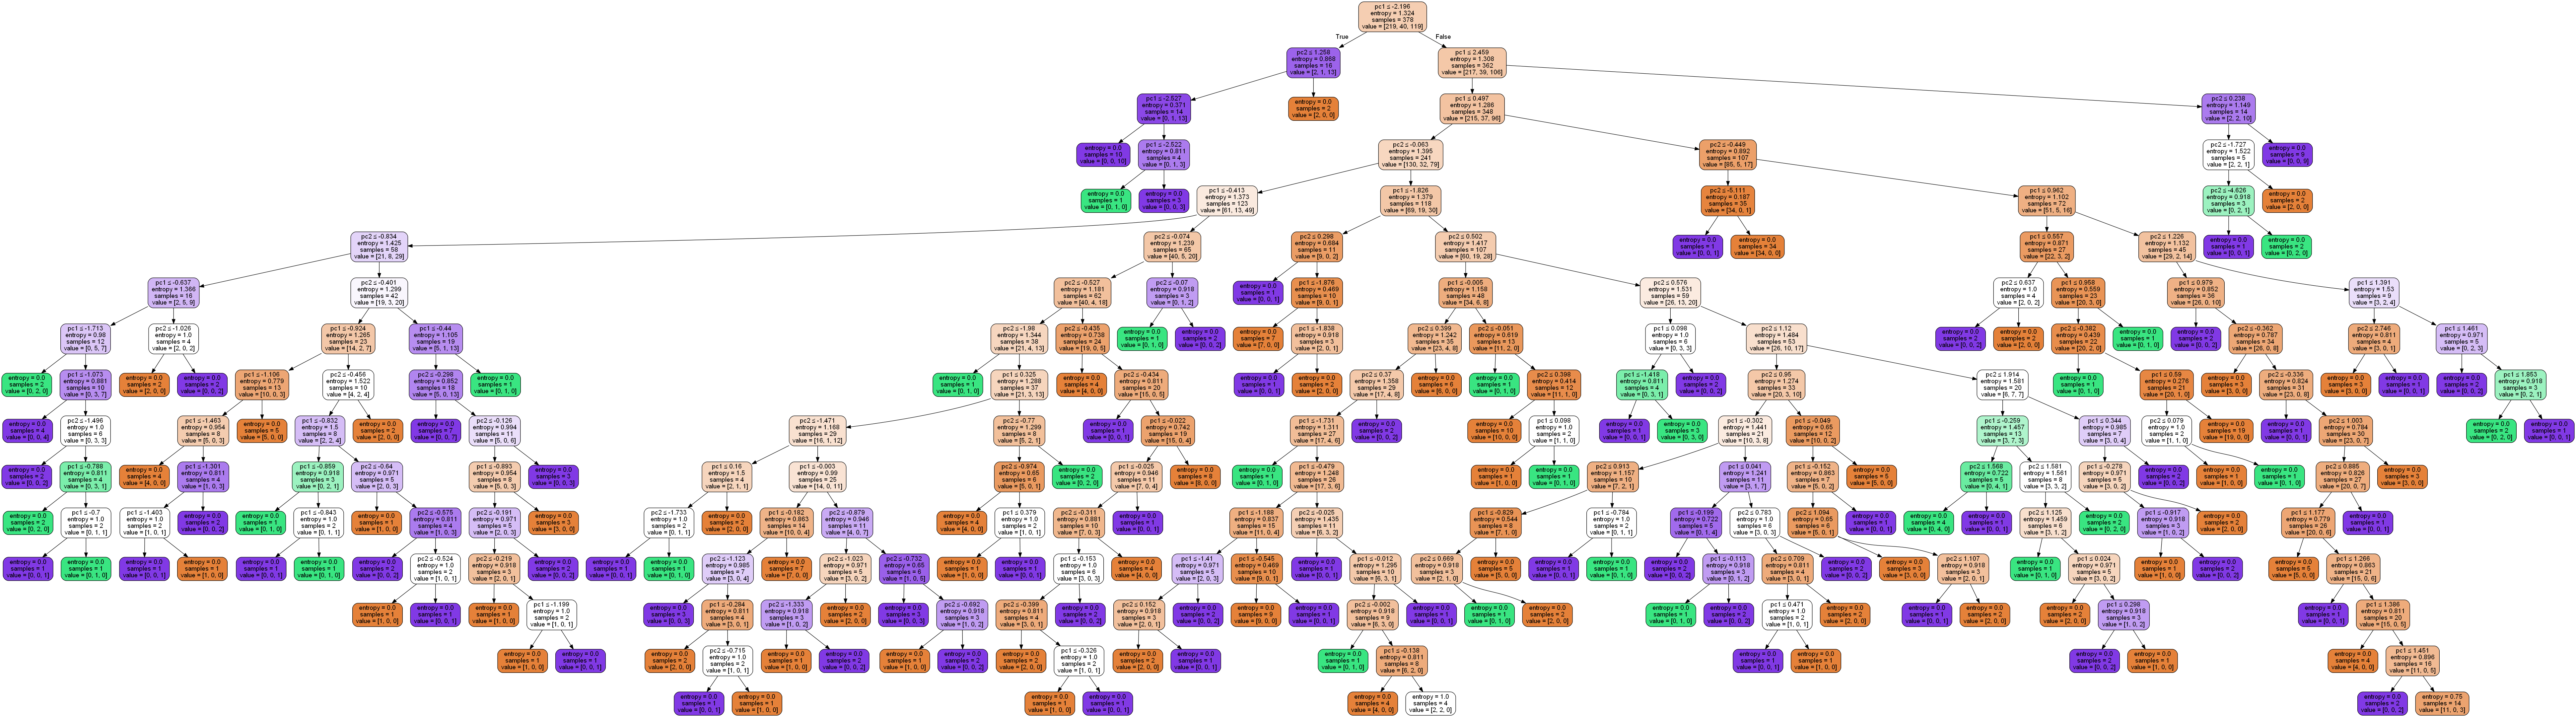

In [4]:
DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=["pc1","pc2"],special_characters=True)
graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

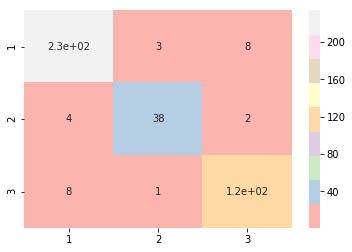

In [5]:
import seaborn
Predicted_Species=obtained_tree.predict(finalDf[['pc1','pc2']])
#print(Predicted_Species)
seaborn.heatmap(confusion_matrix(finalDf['dis'],Predicted_Species),annot=True,cmap="Pastel1",xticklabels=decisiontree.classes_,yticklabels=decisiontree.classes_)

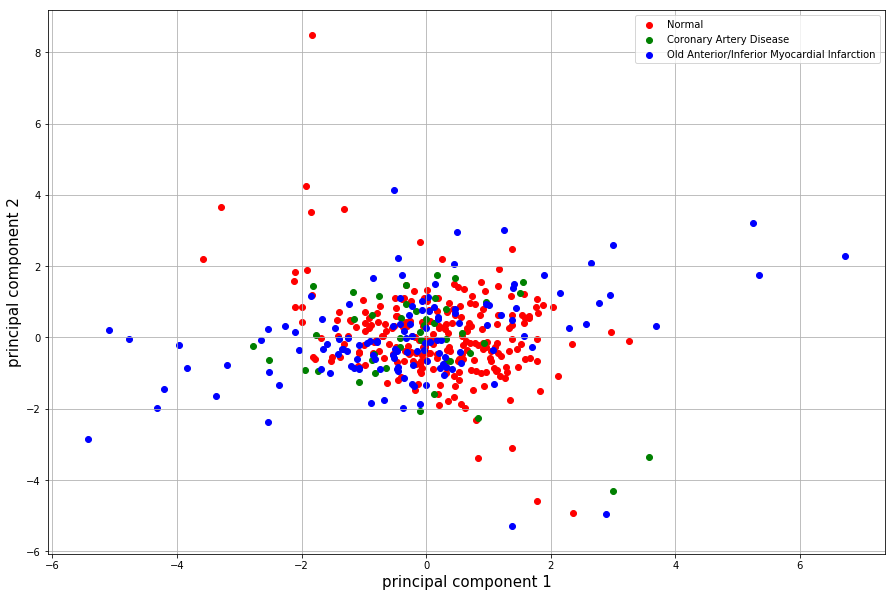

In [6]:
C1=finalDf[finalDf['dis']==1];C2=finalDf[finalDf['dis']==2];C3=finalDf[finalDf['dis']==3]#;C4=finalDf[finalDf['dis']==4]#;C5=finalDf[finalDf['dis']==5]
#C6=finalDf[finalDf['dis']==6];C7=finalDf[finalDf['dis']==7];
plt.figure(figsize=(15,10))
plt.scatter(C1['pc1'],C1['pc2'],color='r',label='Normal')
plt.scatter(C2['pc1'],C2['pc2'],color='g',label='Coronary Artery Disease')
plt.scatter(C3['pc1'],C3['pc2'],color='b',label='Old Anterior/Inferior Myocardial Infarction')
#plt.scatter(C4['pc1'],C4['pc2'],color='black',label='Sinus tachycardy')
#plt.scatter(C5['pc1'],C5['pc2'],color='orange',label='Sinus bradycardy')
#plt.scatter(C6['pc1'],C6['pc2'],color='cyan',label='Ventricular/Supraventricular Premature Contraction')
#plt.scatter(C7['pc1'],C7['pc2'],color='black',label='Left/Right bundle branch block')
plt.xlabel('principal component 1',fontsize=15)
plt.ylabel('principal component 2',fontsize=15)
plt.grid()
plt.legend()